In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
from blackjack_game import BlackjackGame
from strategy import random_strategy, basic_strategy

### Simulation of basic strategy on a game with 3 rounds

In [5]:
game = BlackjackGame(min_bet=10, initial_bet=10, num_decks=6, reshuffle_pct=80)
balance = 1000

for _ in range(3):
    result, info = game.play_round(basic_strategy)
    balance += result
    info = f"ROUND {_+1}\n" + info
    info += f"New balance: {balance}\n"
    info += "-" * 20 + '\n'
    print(info)

ROUND 1
Player's hand: Hand([5 of Diamonds, 7 of Diamonds])
Dealer's hand: 4 of Hearts and [Hidden]

Dealer's hand: Hand([4 of Hearts, 10 of Hearts, K of Clubs])

Player wins with 12 against dealer's 24
New balance: 1010
--------------------

ROUND 2
Player's hand: Hand([7 of Diamonds, Q of Spades])
Dealer's hand: 7 of Hearts and [Hidden]

Dealer's hand: Hand([7 of Hearts, 5 of Hearts, 8 of Clubs])

Dealer wins with 20 against player's 17
New balance: 1000
--------------------

ROUND 3
Player's hand: Hand([3 of Diamonds, 3 of Hearts])
Dealer's hand: 7 of Hearts and [Hidden]
Player splits: Hand([3 of Diamonds, 8 of Diamonds]) and Hand([3 of Hearts, Q of Diamonds])

Player's hand: Hand([3 of Diamonds, 8 of Diamonds])
Dealer's hand: 7 of Hearts and [Hidden]
Player doubles: Hand([3 of Diamonds, 8 of Diamonds, 7 of Clubs])

Player's hand: Hand([3 of Hearts, Q of Diamonds])
Dealer's hand: 7 of Hearts and [Hidden]
Player hits: Hand([3 of Hearts, Q of Diamonds, 4 of Hearts])

Dealer's hand: Ha

### Monte-carlo simulation for 100 games with 250 rounds

In [6]:
def simulate_monte_carlo(strategy, initial_balance= 1000, num_games=100,
                         num_rounds_per_game=200, min_bet=10, initial_bet=10,
                         num_decks=6, reshuffle_pct=80):
    game_settings = {
        "min_bet": min_bet,
        "initial_bet": initial_bet,
        "num_decks": num_decks,
        "reshuffle_pct": reshuffle_pct
    }

    initial_balance = initial_balance
    num_games = num_games
    num_rounds_per_game = num_rounds_per_game

    balance_histories = []
    gain_histories = []
    info_histories = []

    for game_num in range(num_games):
        game = BlackjackGame(**game_settings)
        balance = initial_balance

        balance_history = [balance]
        gain_history = []
        info_history = []

        bankrupt = False
        for _ in range(num_rounds_per_game):
            result, info = game.play_round(strategy)
            balance += result
            info = f"ROUND {_+1}\n" + info
            info += f"New balance: {balance}\n"
            info += "-" * 20 + '\n'

            if balance <0 :
              bankrupt = True

            if bankrupt :
              balance = 0

            balance_history.append(balance)
            gain_history.append(result)
            info_history.append(info)

        balance_histories.append(balance_history)
        gain_histories.append(gain_history)
        info_histories.append(info_history)

    return balance_histories, gain_histories, info_histories

- With a randomized strategy : 

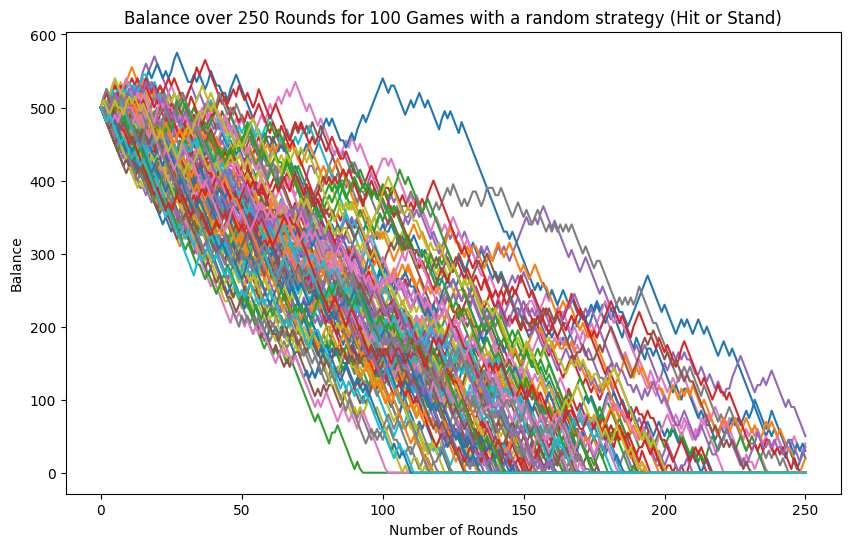

In [7]:
rd_balance_histories, rd_gain_histories, rd_infos = simulate_monte_carlo(
    random_strategy, initial_balance=500, num_rounds_per_game=250
)


plt.figure(figsize=(10, 6))

for i, balance_history in enumerate(rd_balance_histories):
    plt.plot(balance_history, label=f'Game {i+1}')

plt.xlabel('Number of Rounds')
plt.ylabel('Balance')
plt.title('Balance over 250 Rounds for 100 Games with a random strategy (Hit or Stand)')
plt.show()

In [8]:
gains_array = np.array(rd_gain_histories)

mean_gain_rd = np.mean(gains_array, axis=1)
esperance_rd = np.mean(mean_gain_rd)

print("The average earnings expectation per round is", np.round(esperance_rd, 5) , '$ with a 10 $ bet with a random strategy')

The average earnings expectation per round is -3.0284 $ with a 10 $ bet with a random strategy


the player quickly loses his initial bet with a random strategy by chosing randomly hit or still.

- With the basic strategy : 

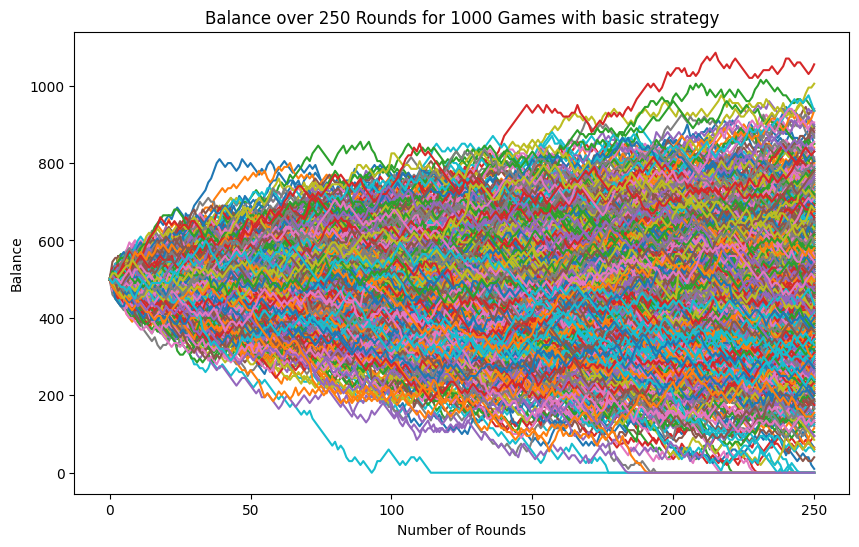

In [9]:
basic_balance_histories, basic_gain_histories, basic_infos = simulate_monte_carlo(
    basic_strategy, initial_balance=500, num_games= 1000, num_rounds_per_game=250
)

plt.figure(figsize=(10, 6))

for i, balance_history in enumerate(basic_balance_histories):
    plt.plot(balance_history, label=f'Game {i+1}')

plt.xlabel('Number of Rounds')
plt.ylabel('Balance')
plt.title('Balance over 250 Rounds for 1000 Games with basic strategy')
plt.show()

In [10]:
gains_array = np.array(basic_gain_histories)

mean_gain_rd = np.mean(gains_array, axis=1)
esperance_rd = np.mean(mean_gain_rd)

print("The average earnings expectation per round is :", np.round(esperance_rd, 5) , '$ with a 10 $ bet with the basic strategy')

The average earnings expectation per round is : -0.08364 $ with a 10 $ bet with the basic strategy


The simulations above show that the mathematical expectation is still negative despite the use of a basic strategy, demonstrating that the Casino still has the advantage. 